# Boum SDK Demo

## Setup

In [1]:
import pandas as pd
import logging
from datetime import time, timedelta
from pprint import pprint

from boum.api_client.constants import API_URL_DEV
from boum.api_client.v1.client import ApiClient
from boum.resources.device import Device
from boum.api_client.v1.models import DeviceStateModel

In [2]:
# Activate logging output
logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [3]:
client =  ApiClient(email='email', password='password', base_url=API_URL_DEV)
device = Device('device-id', client)

## Retrieving device information

In [11]:
with client:
    device_ids = Device.get_device_ids(client)
    reported, desired = device.get_device_states()

    pprint(reported)
    pprint(desired)

INFO:root:Calling _get on https://api-dev.boum.us/v1/devices...
INFO:root:Request successful (200): Device list is retrieved successfully
INFO:root:Calling _get on https://api-dev.boum.us/v1/devices/9a8a5e6d-12d5-4997-b9da-0bb446eacb2f...
INFO:root:Request successful (200): Device is retrieved successfully


DeviceStateModel(refill_time=datetime.time(0, 0),
                 refill_interval_days=None,
                 max_pump_duration_minutes=10,
                 pump_state=False)
DeviceStateModel(refill_time=datetime.time(3, 53),
                 refill_interval_days=4,
                 max_pump_duration_minutes=7,
                 pump_state=False)


## Retreiving telemetry data

In [6]:
with client:
    data = device.get_telemetry_data(interval=timedelta(minutes=10))

INFO:root:Calling _get on https://api-dev.boum.us/v1/devices/9a8a5e6d-12d5-4997-b9da-0bb446eacb2f/data...
INFO:root:Request successful (200): Device timeseries data was retrieved successfully


In [7]:
df = pd.DataFrame(data)
df.set_index('timestamp', inplace=True)
df.head(-10)

,batteryCapacity,temperature,temperatureEsp,wifiStrength,flowRate,solarVoltage,waterTableRange,inputCurrent,batteryCurrent,batteryVoltage,deviceId
timestamp,,,,,,,,,,,


<AxesSubplot: xlabel='timestamp'>

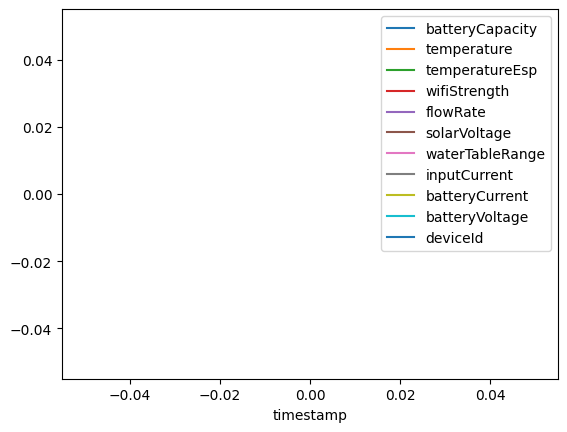

In [8]:
df.plot()

## Setting device state

In [9]:
with client:
    desired_state = DeviceStateModel(
        pump_state=False,
        refill_time=time(3, 53),
        refill_interval_days=4,
        max_pump_duration_minutes=7
    )
    device.set_desired_device_state(desired_state)
    reported_state_out, desired_state_out = device.get_device_states()
    pprint(reported_state_out)
    pprint(desired_state_out)

INFO:root:Calling _patch on https://api-dev.boum.us/v1/devices/9a8a5e6d-12d5-4997-b9da-0bb446eacb2f...
INFO:root:Request successful (200): Device is updated successfully
INFO:root:Calling _get on https://api-dev.boum.us/v1/devices/9a8a5e6d-12d5-4997-b9da-0bb446eacb2f...
INFO:root:Request successful (200): Device is retrieved successfully


DeviceStateModel(refill_time=datetime.time(0, 0),
                 refill_interval_days=None,
                 max_pump_duration_minutes=10,
                 pump_state=False)
DeviceStateModel(refill_time=datetime.time(3, 53),
                 refill_interval_days=4,
                 max_pump_duration_minutes=7,
                 pump_state=False)
